In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/root/kaggle/titanic/data/{}'
train = pd.read_csv(path.format('train.csv'))
test = pd.read_csv(path.format('test.csv'))

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train_corr = train.drop('PassengerId', axis=1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


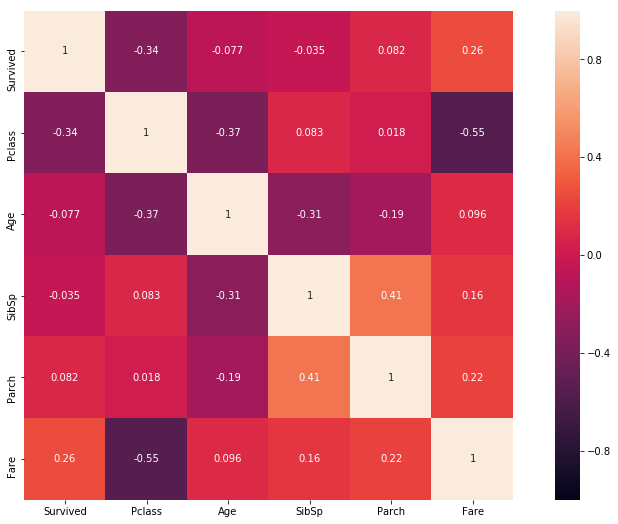

In [7]:
a = plt.subplots(figsize=(15, 9))
b = sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True, square=True)

In [8]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

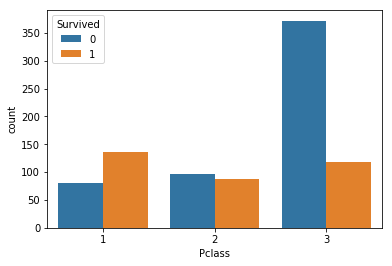

In [9]:
sns.countplot('Pclass', hue='Survived', data=train)

In [10]:
age_not_miss = train[train['Age'].notnull()]

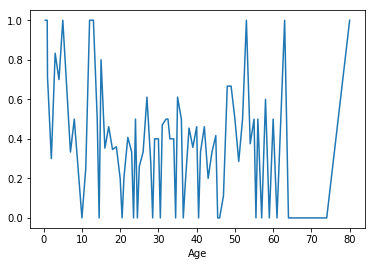

In [11]:
age_not_miss.groupby(['Age'])['Survived'].mean().plot()

In [12]:
age_not_miss['Age'] = pd.cut(age_not_miss['Age'], bins=[0, 18, 30, 45, 100], labels=[1,2,3,4])

/usr/local/soft/anaconda/envs/lechat3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
age_not_miss.groupby('Age')['Survived'].mean()

Age
1    0.503597
2    0.355556
3    0.425743
4    0.368932
Name: Survived, dtype: float64

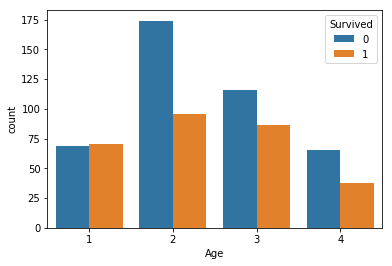

In [14]:
sns.countplot('Age', hue='Survived', data=age_not_miss)

In [15]:
train.groupby(['SibSp'])['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

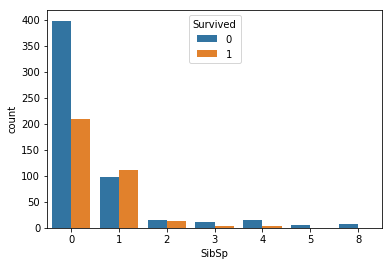

In [16]:
sns.countplot('SibSp', hue='Survived', data=train)

In [17]:
train.groupby(['Parch'])['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

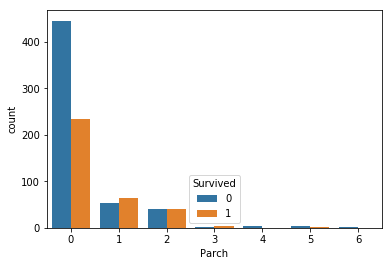

In [18]:
sns.countplot('Parch', hue='Survived', data=train)

In [19]:
train['F_size'] = train['SibSp'] + train['Parch'] + 1

In [20]:
train.groupby('F_size')['Survived'].mean()

F_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

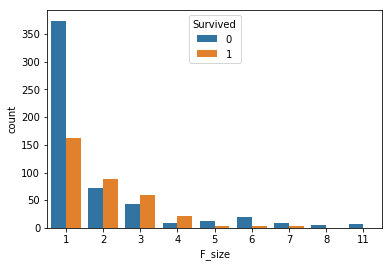

In [21]:
sns.countplot('F_size', hue='Survived', data=train)

In [22]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

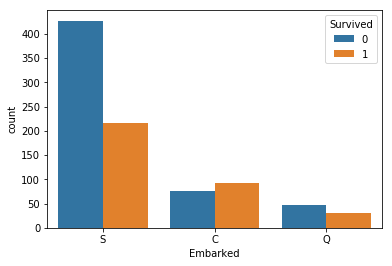

In [23]:
sns.countplot('Embarked', hue='Survived', data=train)

In [24]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

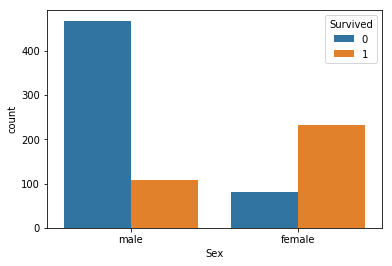

In [25]:
sns.countplot('Sex', hue='Survived', data=train)

In [26]:
train['Fare_bin'] = pd.cut(train['Fare'], 3, labels=[1,2,3])

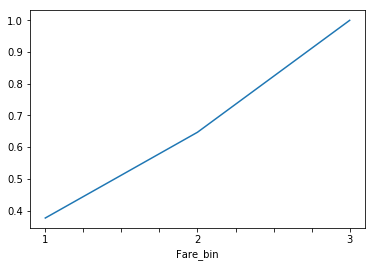

In [27]:
train.groupby('Fare_bin')['Survived'].mean().plot()

In [28]:
del train['F_size']
del train['Fare_bin']

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [30]:
test['Survived'] = 0
train_test = train.append(test)

In [31]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [32]:
train_test = pd.get_dummies(train_test, columns=['Pclass'], prefix='P')

In [33]:
train_test['Name1'] = train_test['Name'].str.extract('.*?,(.*?)\.').str.strip()

/usr/local/soft/anaconda/envs/lechat3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [34]:
#train_test['Name1'].replace(['Capt', 'Col', 'Major'], 'Soldier' , inplace = True)
#train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
#train_test['Name1'].replace(['Dr', 'Rev', 'Master'], 'Social' , inplace = True)
#train_test['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs' , inplace = True)
#train_test['Name1'].replace(['Mlle', 'Miss'], 'Miss' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)
train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady', 'Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Royalty' , inplace = True)
train_test['Name1'].replace(['Mme', 'Ms', 'Mrs', 'Mlle', 'Miss'], 'Mrs' , inplace = True)
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)

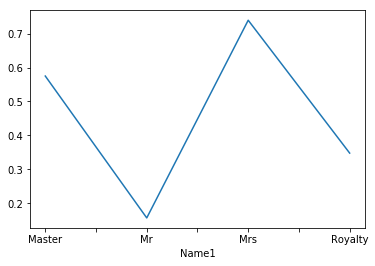

In [35]:
train_test[:891].groupby('Name1')['Survived'].mean().plot()

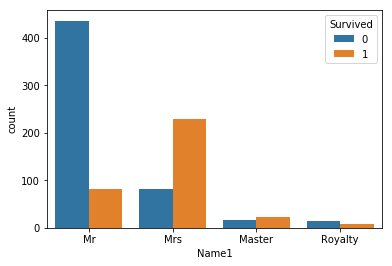

In [36]:
sns.countplot('Name1', hue='Survived', data=train_test[:891])

In [37]:
train_test = pd.get_dummies(train_test, columns=['Name1'])

In [38]:
#train_test['Name2_'] = train_test['Name'].apply(lambda x: x.split('.')[1].strip().split(' ')[0])

In [39]:
#names = train_test['Name2_'].value_counts().reset_index()
#names.columns = ['Name2_', 'Name2_sum']
#train_test = pd.merge(train_test, names, how='left', on='Name2_')

In [40]:
#train_test.loc[train_test['Name2_sum'] == 1, 'Name2'] = 'one'
#train_test.loc[train_test['Name2_sum'] != 1, 'Name2'] = train_test['Name2_']

In [41]:
#train_test.groupby(['Name2'])['Survived'].mean().plot()

In [42]:
#del train_test['Name']
#del train_test['Name2_sum']
#del train_test['Name2_']
#del train_test['Name2_']

In [43]:
#train_test = pd.get_dummies(train_test, columns=['Name2'])

In [44]:
train_test = pd.get_dummies(train_test, columns=['Sex'], prefix='S')

In [45]:
train_test['F_size'] = train_test['SibSp'] + train_test['Parch'] + 1
train_test['F_Single'] = train_test['F_size'].map(lambda s: 1 if s == 1 else 0)
train_test['F_Small'] = train_test['F_size'].map(lambda s: 1 if 2<= s <= 3  else 0)
train_test['F_Med'] = train_test['F_size'].map(lambda s: 1 if s == 4 else 0)
train_test['F_Large'] = train_test['F_size'].map(lambda s: 1 if s >= 5 else 0)
del train_test['F_size']
#del train_test['SibSp']
#del train_test['Parch']
#del train_test['PassengerId']

In [46]:
tpc = train_test['Ticket'].value_counts().reset_index()
tpc.columns = ['Ticket', 'Ticket_sum']
train_test = pd.merge(train_test, tpc, how='left', on='Ticket')
train_test.loc[train_test['Ticket_sum'] == 1, 'T_share'] = 0
train_test.loc[train_test['Ticket_sum'] != 1, 'T_share'] = 1

In [47]:
train_test.loc[train_test['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,...,Name1_Mrs,Name1_Royalty,S_female,S_male,F_Single,F_Small,F_Med,F_Large,Ticket_sum,T_share
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,0,0,3701,...,0,0,0,1,1,0,0,0,1,0.0


In [48]:
train.groupby(['Pclass', 'Embarked']).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [49]:
train_test['Fare'].fillna(14.644083, inplace=True)

In [50]:
train_test['Fare_bin'] = pd.cut(train_test['Fare'], 3, labels=[1,2,3])

In [51]:
train_test['Cabin'] = train_test['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else x)
train_test.loc[train_test['Cabin'].isnull(), 'Cabin_nan'] = 1
train_test.loc[train_test['Cabin'].notnull(), 'Cabin_nan'] = 0
train_test = pd.get_dummies(train_test, columns=['Cabin'])

In [52]:
train_test['Embarked'].fillna('S')
train_test = pd.get_dummies(train_test, columns=['Embarked'], prefix='E')

In [53]:
train_test.loc[train_test['Age'].isnull(), 'Age_nan'] = 1
train_test.loc[train_test['Age'].notnull(), 'Age_nan'] = 0

In [54]:
miss_age = train_test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Survived'], axis=1)
miss_age_train = miss_age[miss_age['Age'].notnull()]
miss_age_test = miss_age[miss_age['Age'].isnull()]
miss_age_train_x = miss_age_train.drop(['Age'], axis=1)
miss_age_train_y = miss_age_train['Age']
miss_age_test_x = miss_age_test.drop(['Age'], axis=1)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
ss = StandardScaler()
ss.fit(miss_age_train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
miss_age_train_x_ss = ss.transform(miss_age_train_x)
miss_age_test_x_ss = ss.transform(miss_age_test_x)

In [58]:
from sklearn import linear_model
model = linear_model.BayesianRidge()

In [59]:
model.fit(miss_age_train_x_ss, miss_age_train_y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [60]:
train_test.loc[train_test['Age'].isnull(), 'Age'] = model.predict(miss_age_test_x_ss)

In [61]:
train_test['Age'] = pd.cut(train_test['Age'], bins=[0, 18, 30, 45, 100], labels=[1, 2, 3, 4])
train_test = pd.get_dummies(train_test, columns=['Age'], prefix='A')

In [62]:
feature_columns = ['PassengerId', 'Name', 'Ticket', 'Fare', 'SibSp', 'Parch']
train_test = train_test.drop(feature_columns, axis=1)

In [63]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 34 columns):
Survived         1309 non-null int64
P_1              1309 non-null uint8
P_2              1309 non-null uint8
P_3              1309 non-null uint8
Name1_Master     1309 non-null uint8
Name1_Mr         1309 non-null uint8
Name1_Mrs        1309 non-null uint8
Name1_Royalty    1309 non-null uint8
S_female         1309 non-null uint8
S_male           1309 non-null uint8
F_Single         1309 non-null int64
F_Small          1309 non-null int64
F_Med            1309 non-null int64
F_Large          1309 non-null int64
Ticket_sum       1309 non-null int64
T_share          1309 non-null float64
Fare_bin         1309 non-null category
Cabin_nan        1309 non-null float64
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint

In [ ]:
train_test_corr = train_test.corr()
c = plt.subplots(figsize=(30, 18))
d = sns.heatmap(train_test_corr, vmin=-1, vmax=1, annot=True, square=True)

In [ ]:
train_data = train_test[:891]
test_data = train_test[891:]
train_data_x = train_data.drop(['Survived'], axis=1)
train_data_y = train_data['Survived']
test_data_x = test_data.drop(['Survived'], axis=1)

In [ ]:
ss1 = StandardScaler()
ss1.fit(train_data_x)

In [ ]:
train_data_x_ss = ss1.transform(train_data_x)
test_data_x_ss = ss1.transform(test_data_x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#params = {'n_estimators':range(100, 300, 10),'min_samples_leaf':range(1, 5),'max_depth':range(3, 6)}
params1 = {'min_samples_leaf':range(1, 5),'max_depth':range(3, 6), 'min_samples_split':range(2,10)}

In [ ]:
#cv = GridSearchCV(estimator=RandomForestClassifier(oob_score=True, n_estimators=220), param_grid=params1, scoring='roc_auc', cv=5)
#cv.fit(train_data_x_ss, train_data_y)

In [ ]:
#cv.best_params_

In [ ]:
rf = RandomForestClassifier(n_estimators=220, min_samples_leaf=3, max_depth=5, min_samples_split=9)
rf.fit(train_data_x_ss, train_data_y)

In [ ]:
rf.score(train_data_x_ss, train_data_y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
params2 = {'C':[0.001,0.01,0.1,1,10], "max_iter":range(100, 500, 50)}

In [ ]:
#cv = GridSearchCV(estimator=LogisticRegression(class_weight='balanced'), param_grid=params2, scoring='roc_auc', cv=5, verbose=1)
#cv.fit(train_data_x_ss, train_data_y)

In [ ]:
#cv.best_params_

In [ ]:
lr = LogisticRegression(class_weight='balanced', C=0.01, max_iter=100)

In [ ]:
lr.fit(train_data_x_ss, train_data_y)

In [ ]:
lr.score(train_data_x_ss, train_data_y)

In [ ]:
from sklearn import svm

In [ ]:
#cv = GridSearchCV(estimator=svm.SVC(), param_grid=params2, scoring='roc_auc', cv=5)
#cv.fit(train_data_x_ss, train_data_y)

In [ ]:
#cv.best_params_

In [ ]:
svc = svm.SVC(C=10, max_iter=350, probability=True)

In [ ]:
svc.fit(train_data_x_ss, train_data_y)

In [ ]:
svc.score(train_data_x_ss, train_data_y)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
params3 = {'learning_rate': [0.5, 0.6, 0.7, 0.8], 'n_estimators':range(100, 300, 10)}

In [ ]:
#cv = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params3, scoring='roc_auc', cv=5)
#cv.fit(train_data_x_ss, train_data_y)

In [ ]:
#cv.best_params_

In [ ]:
gbdt = GradientBoostingClassifier(learning_rate=0.5, n_estimators=120)
gbdt.fit(train_data_x_ss, train_data_y)

In [ ]:
gbdt.score(train_data_x_ss, train_data_y)

In [ ]:
import xgboost as xgb

In [ ]:
#cv = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params3, scoring='roc_auc', cv=5)
#cv.fit(train_data_x_ss, train_data_y)

In [ ]:
#cv.best_params_

In [ ]:
xg = xgb.XGBClassifier(learning_rate=0.8, n_estimators=100)
xg.fit(train_data_x_ss, train_data_y)
xg.score(train_data_x_ss, train_data_y)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
params4 = {'n_estimators':range(100, 300, 10)}

In [ ]:
#cv = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=params4, scoring='roc_auc', cv=5)
#cv.fit(train_data_x_ss, train_data_y)

In [ ]:
#cv.best_params_

In [ ]:
et = ExtraTreesClassifier(n_estimators=200)
et.fit(train_data_x_ss, train_data_y)
et.score(train_data_x_ss, train_data_y)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=220, min_samples_leaf=3, max_depth=5, oob_score=True)
lr = LogisticRegression(class_weight='balanced', C=0.01, max_iter=100)
svc = svm.SVC(C=10, max_iter=350, probability=True)
gbdt = GradientBoostingClassifier(learning_rate=0.5, n_estimators=120)
xg = xgb.XGBClassifier(learning_rate=0.8, n_estimators=100)
et = ExtraTreesClassifier(n_estimators=200)

In [ ]:
vot = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('svc', svc), ('gbdt', gbdt), ('xg', xg), ('et', et)], voting='hard')
vot.fit(train_data_x_ss, train_data_y)
vot.score(train_data_x_ss, train_data_y)

In [ ]:
clfs = [rf, lr, svc, gbdt, xg, et]

In [ ]:
from sklearn.cross_validation import StratifiedKFold

In [ ]:
X = np.array(train_data_x_ss)
Y = np.array(train_data_y)
X_test = np.array(train_data_x_ss)
Y_test = np.array(train_data_y)

In [ ]:
train_blend = np.zeros((X.shape[0], len(clfs)))
test_blend = np.zeros((X_test.shape[0], len(clfs)))

In [ ]:
skf = list(StratifiedKFold(Y, 5))

In [ ]:
for i, clf in enumerate(clfs):
    test_blend_i = np.zeros((test_blend.shape[0], len(skf)))
    for j, (train, test) in enumerate(skf):
        clf.fit(X[train], Y[train])
        train_blend[test, i] = clf.predict_proba(X[test])[:, 1]
        test_blend_i[:, j] = clf.predict_proba(X_test)[:, 1]
    test_blend[:, i] = test_blend_i.mean(1)

In [ ]:
#cv = GridSearchCV(estimator=LogisticRegression(), param_grid={'C':[0.001,0.01,0.1,1,10], "max_iter":range(100, 500, 50)}, cv=5, scoring='roc_auc')

In [ ]:
#cv.fit(train_blend, Y)

In [ ]:
#cv.best_params_

In [ ]:
clf2 = LogisticRegression(C=10, max_iter=100)
clf2.fit(train_blend, Y)

In [ ]:
clf2.score(test_blend, Y_test)